rcp8.5 gwl_1_5
rcp8.5 gwl_2
rcp8.5 gwl_4
rcp2.6 gwl_4
rcp2.6 gwl_1_5
rcp2.6 gwl_2


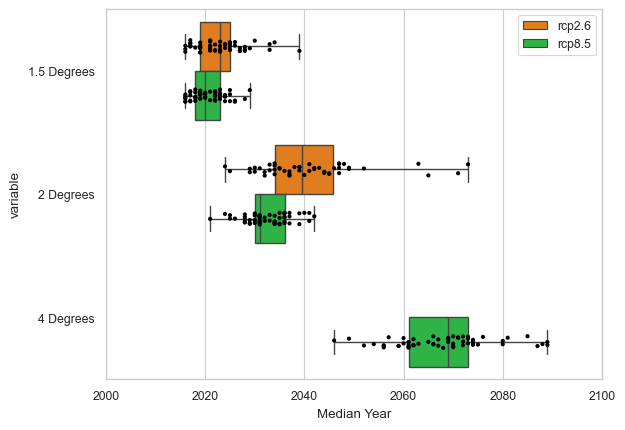

In [1]:
from ffdi_variables_analysis import get_ens_df, plot_gwl_year
import pandas as pd
import cftime
import iris

# Load the ensemble jobids and GWLs
ensdf = get_ens_df()
df = ensdf.copy()
plot_gwl_year(ensdf)

In [2]:
df

rcp   hist    fut  gwl_1_5_start  gwl_2_start  gwl_4_start
0    rcp2.6  akowa  akuka         2007.0       2019.0         <NA>
1    rcp2.6  akowb  akukb         2011.0       2037.0         <NA>
2    rcp2.6  akowc  akukc         2023.0       2037.0         <NA>
3    rcp2.6  akowe  akuke         2009.0       2023.0         <NA>
4    rcp2.6  akowf  akukf         2013.0       2035.0         <NA>
..      ...    ...    ...            ...          ...          ...
109  rcp8.5  akozl  aldsl         2013.0       2027.0       2062.0
110  rcp8.5  akozn  aldsn         2006.0       2021.0       2064.0
111  rcp8.5  akozo  aldso         2006.0       2020.0       2051.0
112  rcp8.5  akozp  aldsp         2006.0       2023.0       2062.0
113  rcp8.5  akozq  aldsq         2013.0       2024.0       2056.0

[114 rows x 6 columns]

To generate these files, I need to run the following shell script:

`/net/home/h02/hadhy/PycharmProjects/fire_paper/ffdi_variables_analysis.sh`

### Load the pre-processed data

Note that the data in these files is a 0.1% sample of all the grid cells for a given country that have either 12 <= FFDI < 24, or FFDI >= 24 

In many of the subsequent plots, we take a 10% (or 1%) sample of that, meaning that the plots are showing 0.01% (or 0.001%) of the full data

In [5]:
df_final1 = pd.read_csv('/data/users/hadhy/ESMS/fire_paper/data/odf_bigdata_3countries_12_to_24.csv')
df_final2 = pd.read_csv('/data/users/hadhy/ESMS/fire_paper/data/odf_bigdata_3countries_gt_24.csv')

In [6]:
df_final = pd.concat([df_final1, df_final2], ignore_index=True)

In [7]:
df_final.columns

Index(['0', 't', 'x', 'y', 'gwl', 'ensemble_member', 'rcp', 'FFDI',
       'air_temperature', 'precipitation_in_mpersec', 'relative_humidity',
       'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr', 'names'],
      dtype='object')

In [8]:
df_final['ffdi_class'] = 0

class12_24 = (df_final.FFDI >= 12) & (df_final.FFDI < 24) 
df_final['ffdi_class'].loc[class12_24] = '12 <= FFDI < 24'

class_gt24 = (df_final.FFDI >= 24)
df_final['ffdi_class'].loc[class_gt24] = 'FFDI >= 24'

## Create some initial scatter plots

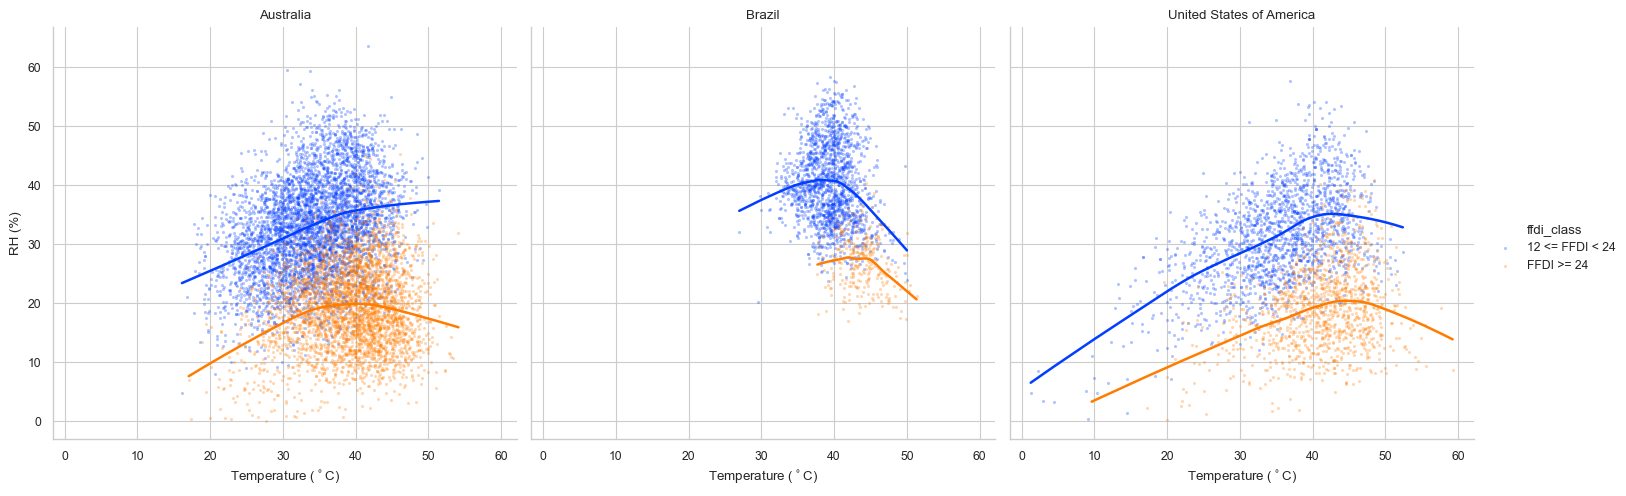

In [11]:
# vars = ['relative_humidity', 'soil_moisture_content_top_metre', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'air_temperature']
import seaborn as sns
import matplotlib.pyplot as plt

gwl_order = ['Baseline', 'GWL1.5', 'GWL2', 'GWL4']
country_order = ['Australia', 'Brazil', 'United States of America']

# g = sns.lmplot(data=df_final_long.loc[(df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4')].sample(frac=0.05, replace=False), x='FFDI', y='value', hue='gwl', row='variable', row_order=var_order, col='names', col_order=country_order, hue_order=gwl_order, palette="bright", aspect=2.7, height=1.7, lowess=True, facet_kws={'sharex': True, 'sharey': False}, scatter_kws={'alpha':0.3, 'linewidths': 0, 's': 5})  # size='soil_moisture_content_top_metre', sizes=(1,100), style='rcp', hue='ffdi_class', hue='variable', 

# g.set_titles(row_template='{row_name}', col_template='{col_name}')  
# for i, ax in enumerate(g.axes[:, 0]):
#     ax.set_ylabel(var_units[i])


g = sns.lmplot(data=df_final.sample(frac=0.1, replace=False), x='air_temperature', y='relative_humidity', hue='ffdi_class', col='names', col_order=country_order, col_wrap=3, palette="bright", lowess=True, facet_kws={'sharex': True, 'sharey': True}, scatter_kws={'alpha':0.3, 'linewidths': 0, 's': 5})  # style='rcp', size='FFDI', sizes=(1,100), hue_order=gwl_order, 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="Temperature ($^\circ$C)", y_var="RH (%)")

plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Australia-Brazil-USA_ffdi-class.png')

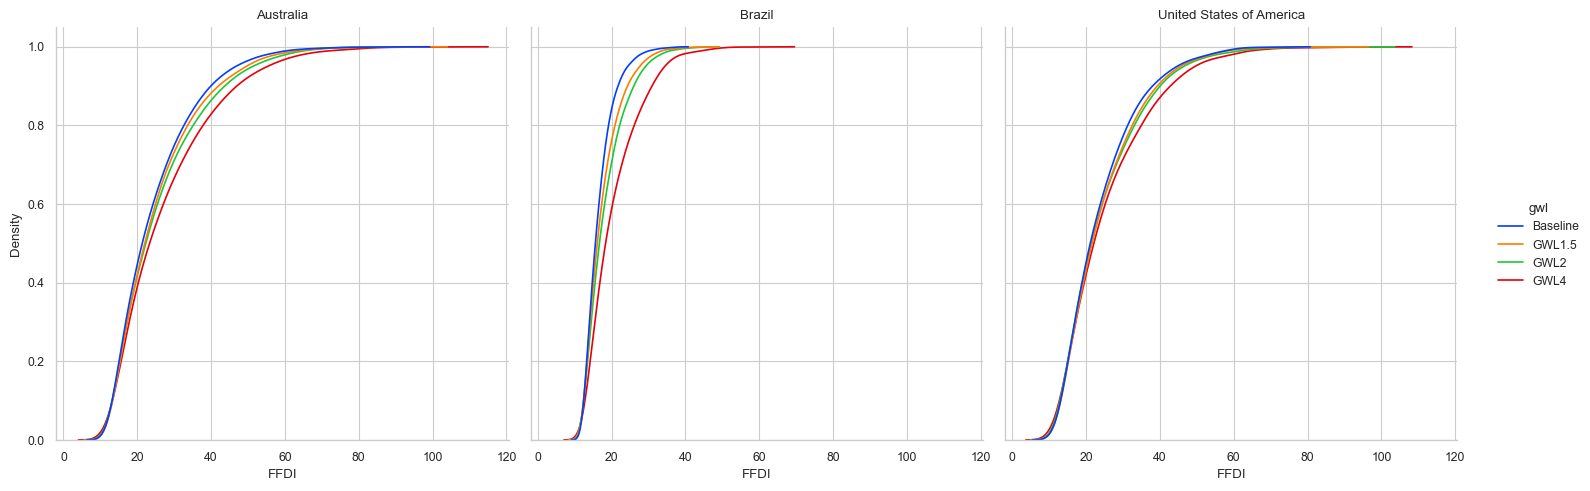

In [12]:
g = sns.displot(data=df_final.sample(frac=0.3, replace=False), x="FFDI", hue="gwl", col='names', col_order=country_order, hue_order=gwl_order, kind="kde", log_scale=False, cumulative=True, common_norm=False, palette="bright")
g.set_titles(col_template='{col_name}')  
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Australia-Brazil-USA_ffdi-CDF.png')

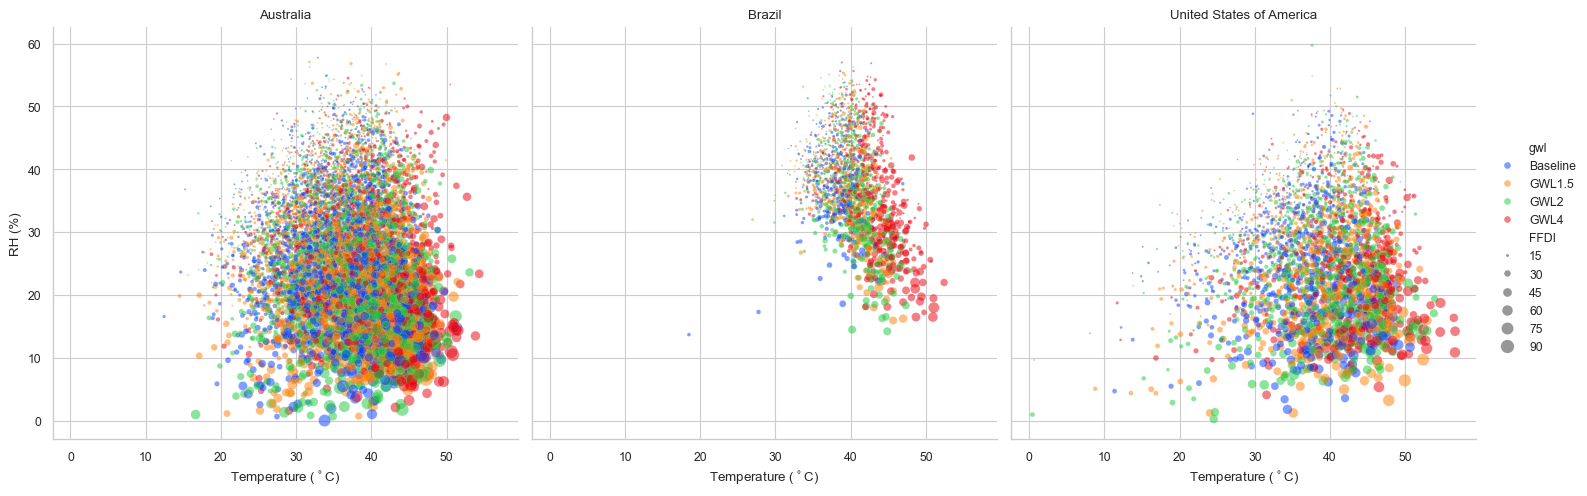

In [13]:
g = sns.relplot(data=df_final.sample(frac=0.1, replace=False), x='air_temperature', y='relative_humidity', hue='gwl', size='FFDI', sizes=(1,100), alpha=.5, kind='scatter', hue_order=gwl_order, col='names', col_order=country_order, col_wrap=3, palette="bright")  # style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="Temperature ($^\circ$C)", y_var="RH (%)")
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Australia-Brazil-USA_temp-vs-rh.png')

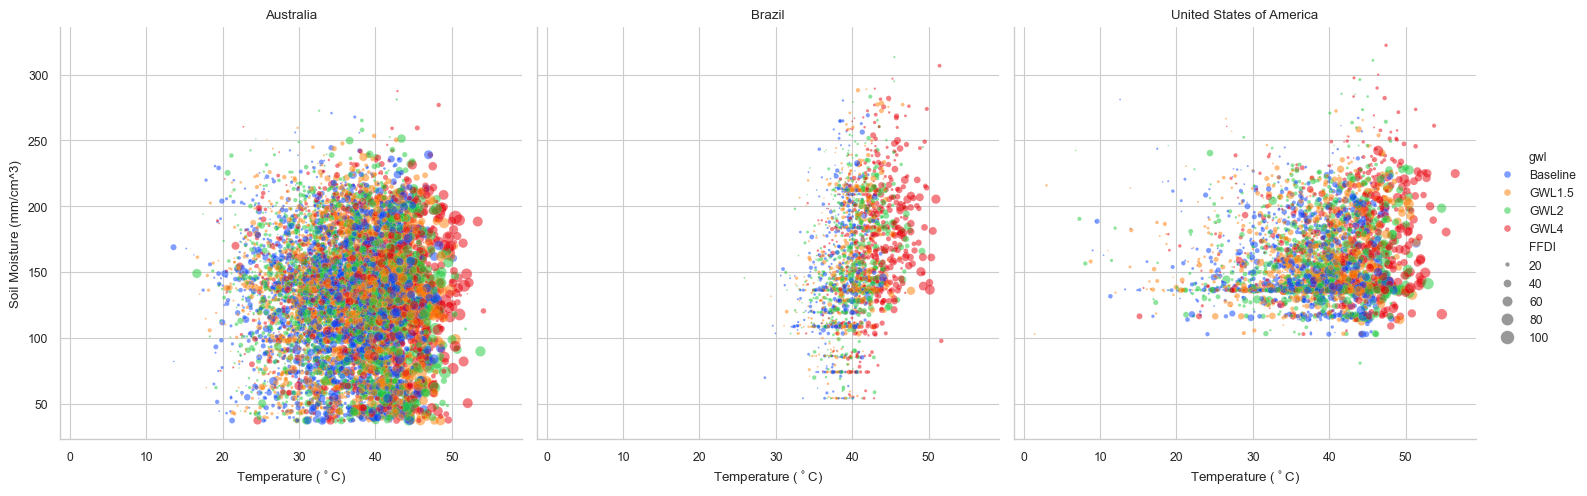

In [14]:
g = sns.relplot(data=df_final.sample(frac=0.1, replace=False), x='air_temperature', y='soil_moisture_content_top_metre', hue='gwl', size='FFDI', sizes=(1,100), alpha=.5, kind='scatter', hue_order=gwl_order, col='names', col_order=country_order, col_wrap=3, palette="bright")  # style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="Temperature ($^\circ$C)", y_var="Soil Moisture (mm/cm^3)")

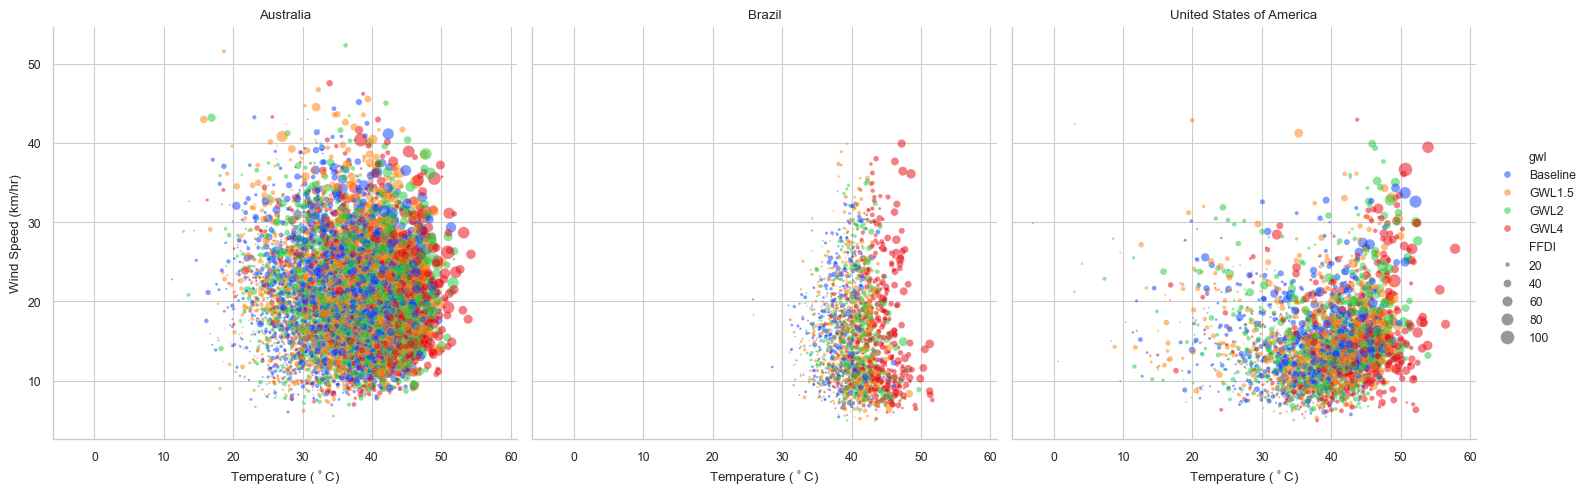

In [15]:
g = sns.relplot(data=df_final.sample(frac=0.1, replace=False), x='air_temperature', y='windspeed_in_km_per_hr', hue='gwl', size='FFDI', sizes=(1,100), alpha=.5, kind='scatter', hue_order=gwl_order, col='names', col_wrap=3, col_order=country_order, palette="bright")  # style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="Temperature ($^\circ$C)", y_var="Wind Speed (km/hr)") 

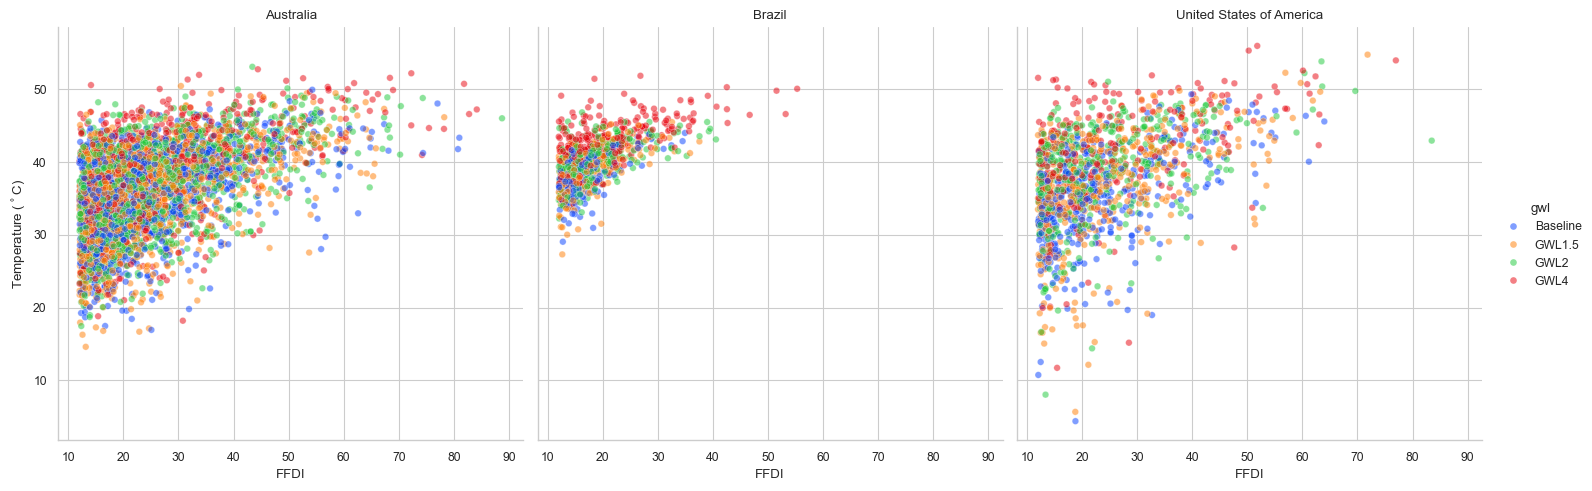

In [16]:
g = sns.relplot(data=df_final.sample(frac=0.05, replace=False), x='FFDI', y='air_temperature', hue='gwl', alpha=.5, kind='scatter', hue_order=gwl_order, col='names', col_wrap=3, col_order=country_order, palette="bright")  # size='soil_moisture_content_top_metre', sizes=(1,100), style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="FFDI", y_var="Temperature ($^\circ$C)")

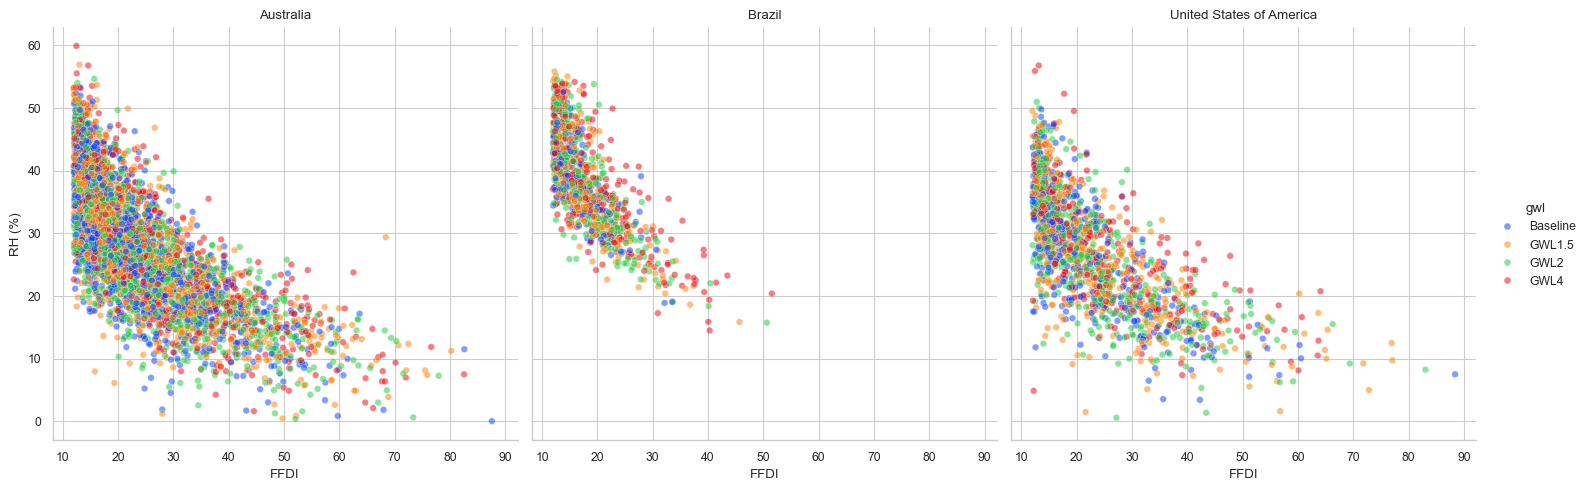

In [17]:
g = sns.relplot(data=df_final.sample(frac=0.05, replace=False), x='FFDI', y='relative_humidity', hue='gwl', alpha=.5, kind='scatter', hue_order=gwl_order, col='names', col_wrap=3, col_order=country_order, palette="bright")  # size='soil_moisture_content_top_metre', sizes=(1,100), style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="FFDI", y_var="RH (%)")

In [18]:
df_final_long = pd.melt(df_final, id_vars=['t', 'x', 'y', 'gwl', 'ensemble_member', 'rcp', 'names', 'FFDI', 'ffdi_class'], value_vars=['air_temperature', 'precipitation_in_mpersec', 'relative_humidity', 'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr'])

In [89]:
df_final_long

t       x     y       gwl ensemble_member     rcp  \
0       1995-12-16 12:00:00  116.25 -32.5  Baseline           akuka  rcp2.6   
1       1999-11-26 12:00:00  116.25 -32.5  Baseline           akuka  rcp2.6   
2       2001-08-16 12:00:00  138.75 -20.0  Baseline           akuka  rcp2.6   
3       1999-08-27 12:00:00  120.00 -22.5  Baseline           akuka  rcp2.6   
4       2005-10-03 12:00:00  142.50 -25.0  Baseline           akuka  rcp2.6   
...                     ...     ...   ...       ...             ...     ...   
641210  2069-09-02 12:00:00 -101.25  37.5      GWL4           aldsq  rcp8.5   
641211  2067-06-21 12:00:00 -105.00  32.5      GWL4           aldsq  rcp8.5   
641212  2064-06-27 12:00:00  -93.75  32.5      GWL4           aldsq  rcp8.5   
641213  2057-07-06 12:00:00 -108.75  37.5      GWL4           aldsq  rcp8.5   
641214  2062-06-04 12:00:00 -101.25  35.0      GWL4           aldsq  rcp8.5   

                           names       FFDI       ffdi_class  \
0                      Australia  17.348682  12 <= FFDI < 24   
1                      Australia  23.388343  12 <= FFDI < 24   
2                      Australia  13.829465  12 <= FFDI < 24   
3                      Australia  17.432392  12 <= FFDI < 24   
4                      Australia  23.764393  12 <= FFDI < 24   
...                          ...        ...              ...   
641210  United States of America  52.465640       FFDI >= 24   
641211  United States of America  58.977545       FFDI >= 24   
641212  United States of America  33.577531       FFDI >= 24   
641213  United States of America  53.567854       FFDI >= 24   
641214  United States of America  55.870780       FFDI >= 24   

                  variable      value  
0       2m Air Temperature  31.335993  
1       2m Air Temperature  38.079369  
2       2m Air Temperature  23.412775  
3       2m Air Temperature  33.773003  
4       2m Air Temperature  33.962395  
...                    ...        ...  
641210          Wind Speed  20.068317  
641211          Wind Speed  21.132799  
641212          Wind Speed  17.540618  
641213          Wind Speed  14.182533  
641214          Wind Speed  27.109921  

[641215 rows x 11 columns]

In [19]:
df_final.columns

Index(['0', 't', 'x', 'y', 'gwl', 'ensemble_member', 'rcp', 'FFDI',
       'air_temperature', 'precipitation_in_mpersec', 'relative_humidity',
       'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr', 'names',
       'ffdi_class'],
      dtype='object')

In [20]:
df_final_long.loc[df_final_long.variable == 'air_temperature', 'variable'] = '2m Air Temperature'
df_final_long.loc[df_final_long.variable == 'precipitation_in_mpersec', 'variable'] = 'Precipitation'
df_final_long.loc[df_final_long.variable == 'relative_humidity', 'variable'] = 'Relative Humidity'
df_final_long.loc[df_final_long.variable == 'soil_moisture_content_top_metre', 'variable'] = 'Soil Moisture'
df_final_long.loc[df_final_long.variable == 'windspeed_in_km_per_hr', 'variable'] = 'Wind Speed'

In [21]:
pd.unique(df_final_long.variable)

array(['2m Air Temperature', 'Precipitation', 'Relative Humidity',
       'Soil Moisture', 'Wind Speed'], dtype=object)

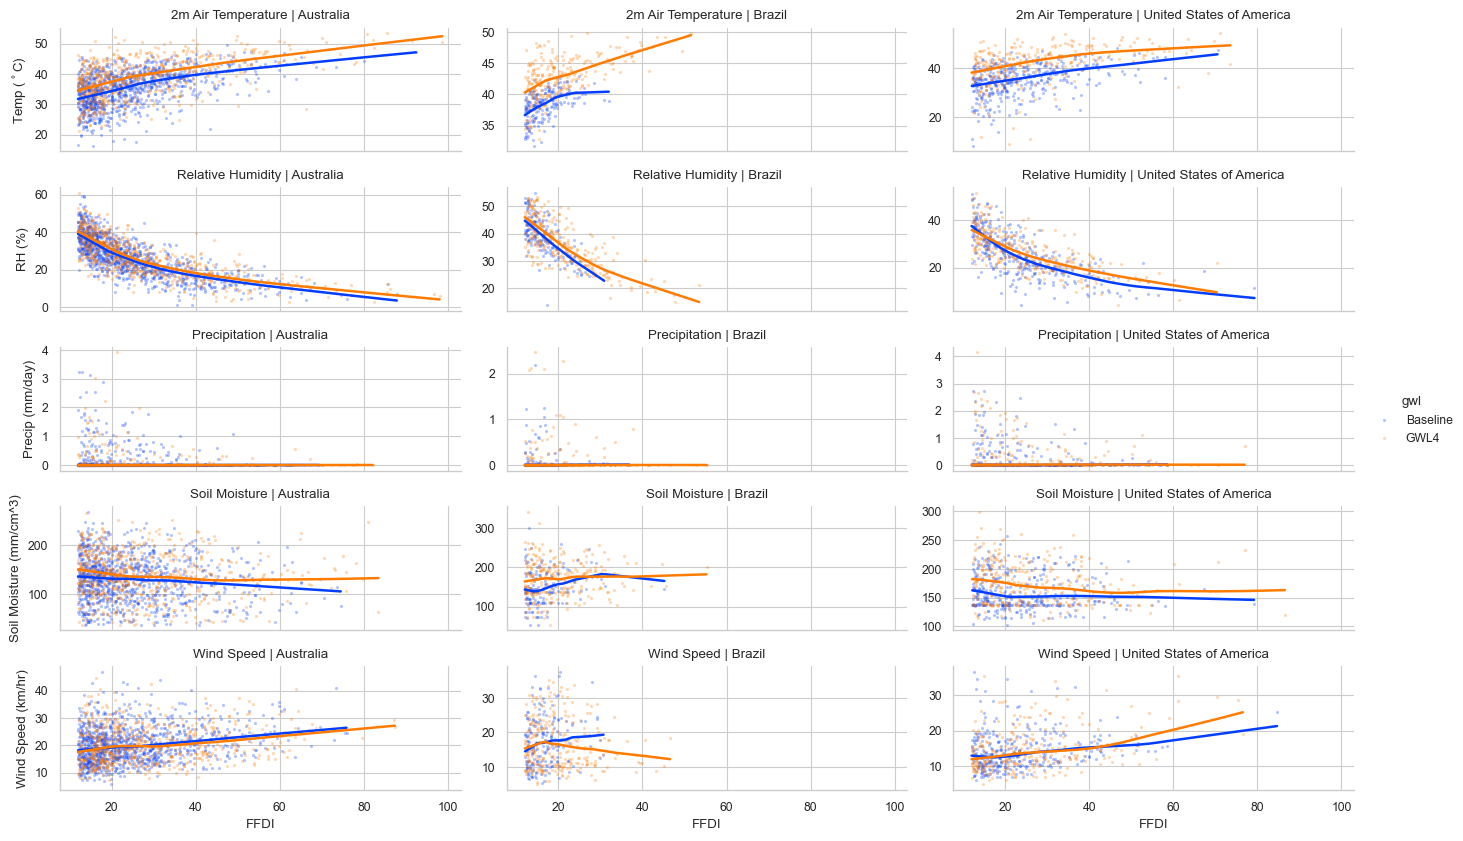

In [22]:
var_order = ['2m Air Temperature', 'Relative Humidity', 'Precipitation', 'Soil Moisture', 'Wind Speed']
var_units = ["Temp ($^\circ$C)", "RH (%)", "Precip (mm/day)", "Soil Moisture (mm/cm^3)", "Wind Speed (km/hr)"]
gwl_order = ['Baseline', 'GWL4']

# plt.figure(figsize=(12, 5))

g = sns.lmplot(data=df_final_long.loc[(df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4')].sample(frac=0.05, replace=False), x='FFDI', y='value', hue='gwl', row='variable', row_order=var_order, col='names', col_order=country_order, hue_order=gwl_order, palette="bright", aspect=2.7, height=1.7, lowess=True, facet_kws={'sharex': True, 'sharey': False}, scatter_kws={'alpha':0.3, 'linewidths': 0, 's': 5})  # size='soil_moisture_content_top_metre', sizes=(1,100), style='rcp', hue='ffdi_class', hue='variable', 

g.set_titles(row_template='{row_name}', col_template='{col_name}')  
for i, ax in enumerate(g.axes[:, 0]):
    ax.set_ylabel(var_units[i])

plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Australia-Brazil-USA_baseline-4C.png')

In [23]:
df_final.columns

Index(['0', 't', 'x', 'y', 'gwl', 'ensemble_member', 'rcp', 'FFDI',
       'air_temperature', 'precipitation_in_mpersec', 'relative_humidity',
       'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr', 'names',
       'ffdi_class'],
      dtype='object')

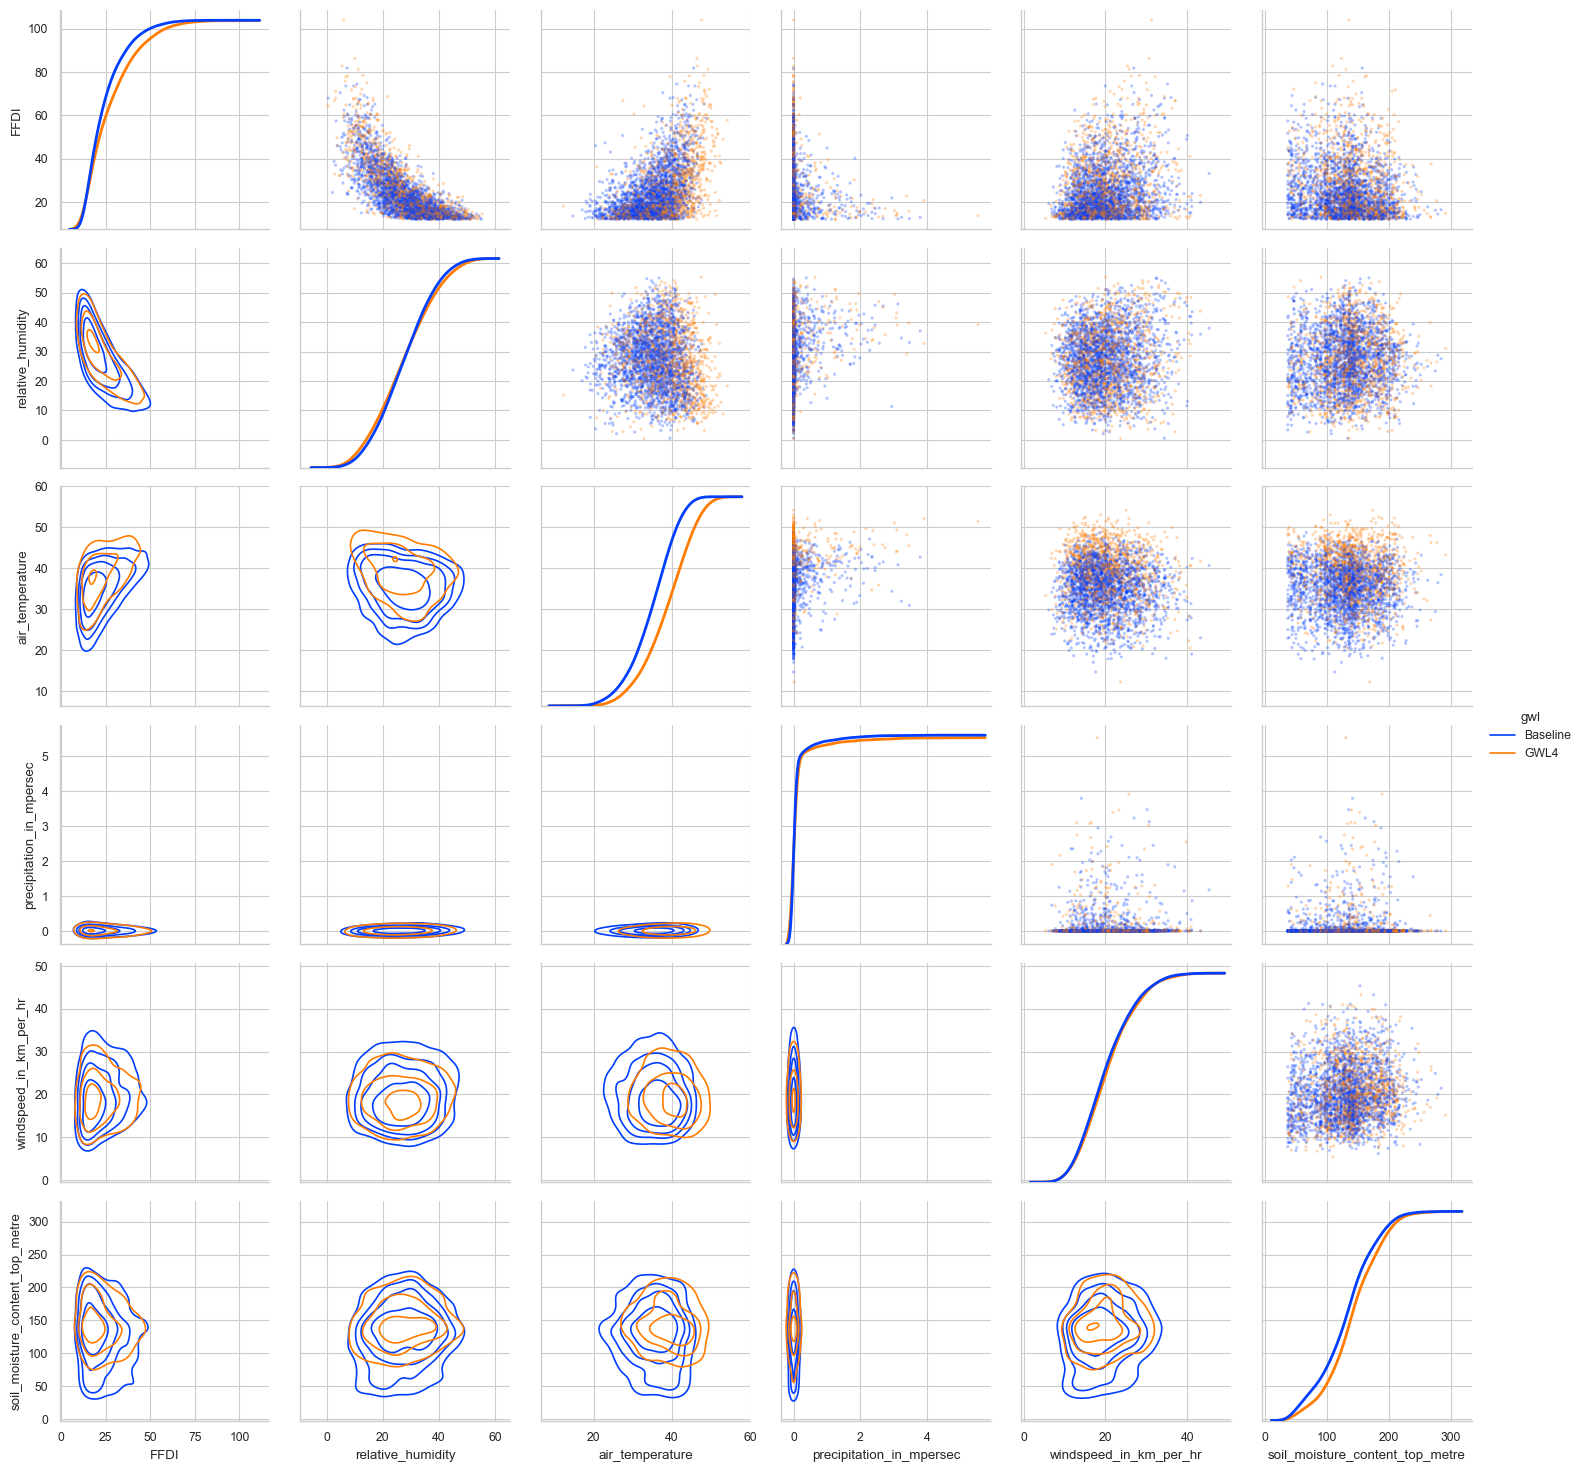

In [77]:
g = sns.PairGrid(data=df_final[df_final.names.isin(['Australia']) & ((df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4'))].sample(frac=0.1, replace=False), vars=['FFDI', 'relative_humidity', 'air_temperature', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'soil_moisture_content_top_metre'], hue='gwl', palette="bright", hue_order=gwl_order)  # 'Australia', 'United States of America'
g.map_upper(sns.scatterplot, alpha=0.3, linewidths=0, s=5)
g.map_lower(sns.kdeplot, levels=5, thresh=.2)
g.map_diag(sns.kdeplot, lw=2, cumulative=True, common_norm=False, common_grid=True)
# g.map_diag(sns.histplot, multiple='stack')
g.add_legend()
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Australia-pairsplot_baseline-vs-4C.png')

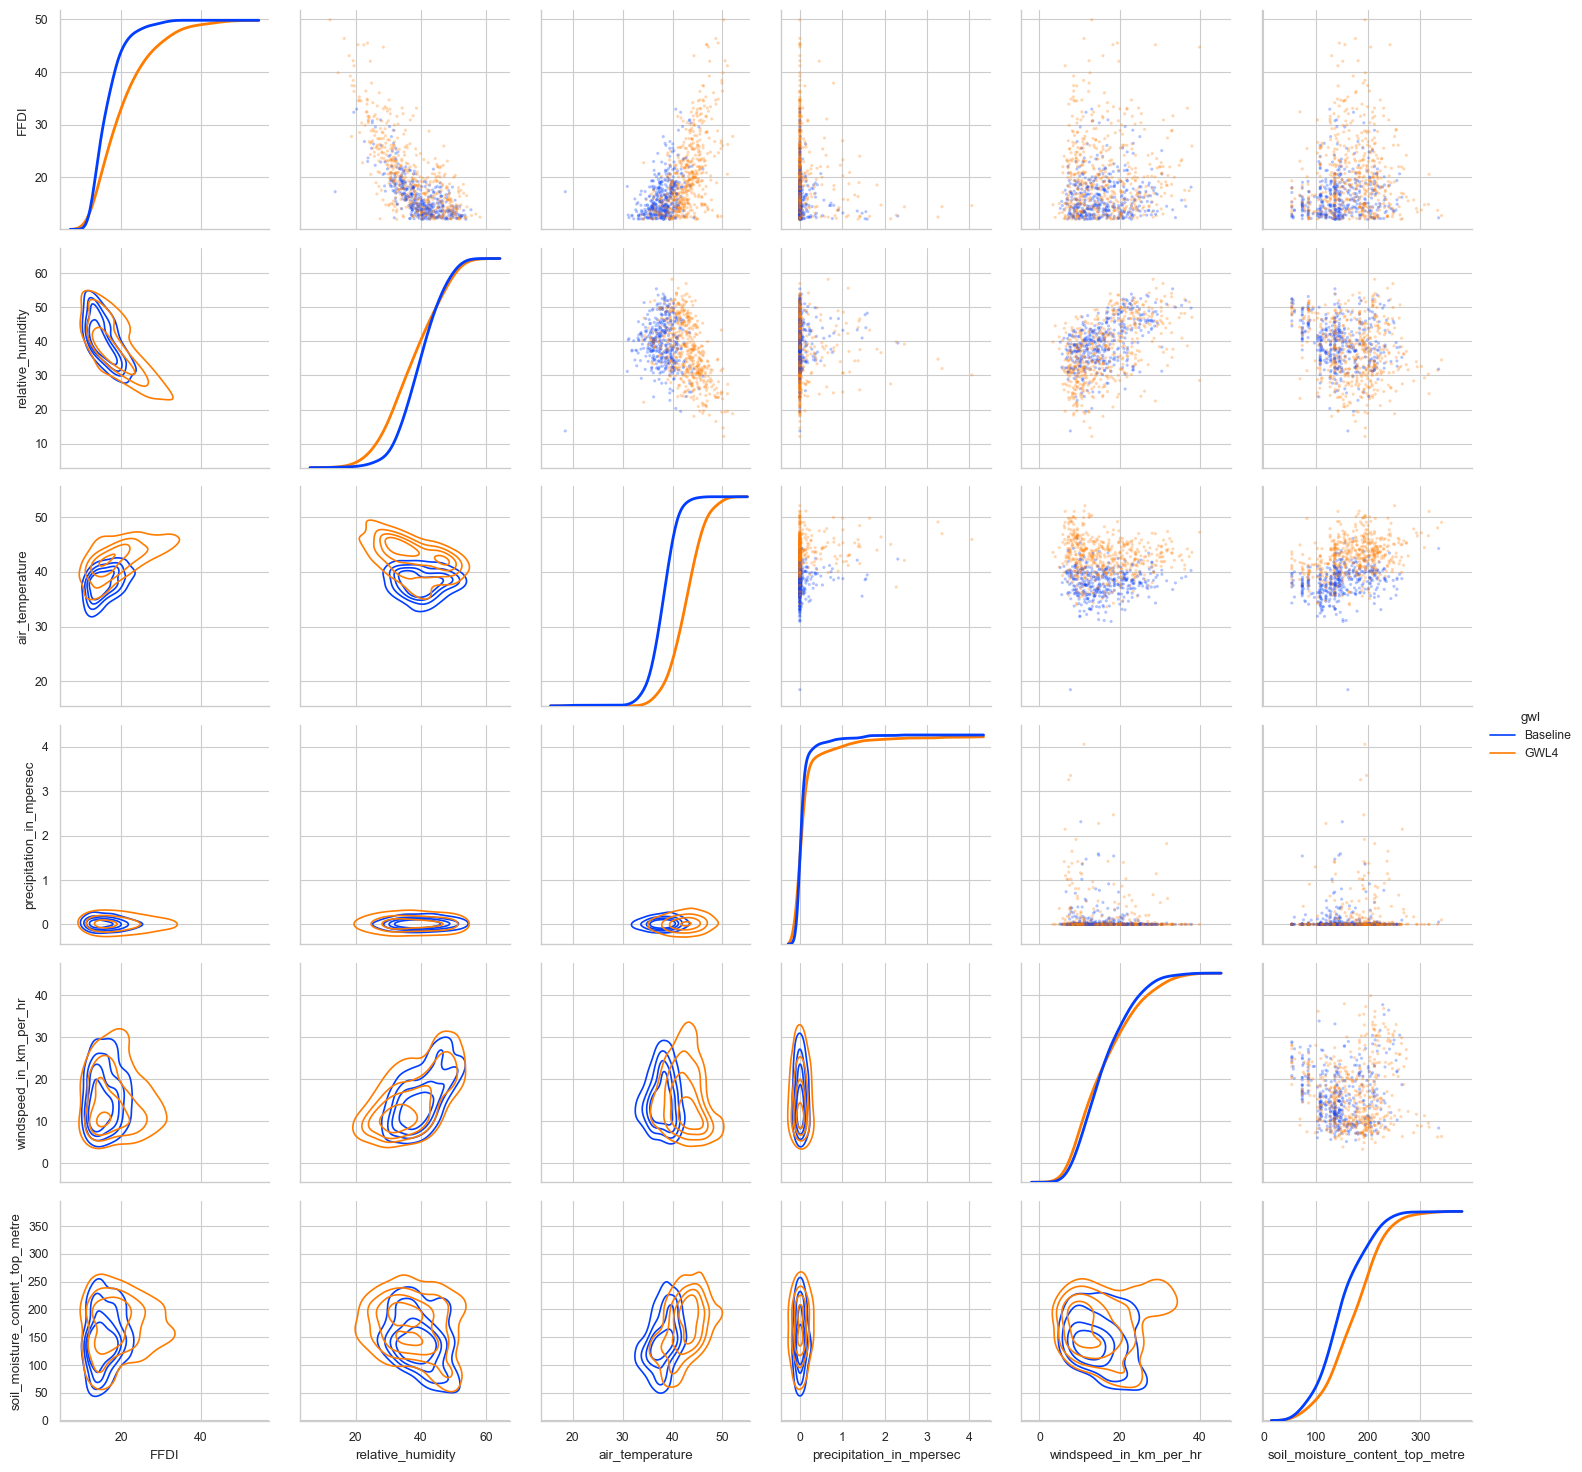

In [79]:
g = sns.PairGrid(data=df_final[df_final.names.isin(['Brazil']) & ((df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4'))].sample(frac=0.1, replace=False), vars=['FFDI', 'relative_humidity', 'air_temperature', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'soil_moisture_content_top_metre'], hue='gwl', palette="bright", hue_order=gwl_order)  # 'Australia', 'United States of America'
g.map_upper(sns.scatterplot, alpha=0.3, linewidths=0, s=5)
g.map_lower(sns.kdeplot, levels=5, thresh=.2)
g.map_diag(sns.kdeplot, lw=2, cumulative=True, common_norm=False, common_grid=True)
g.add_legend()
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Brazil-pairsplot_baseline-vs-4C.png')

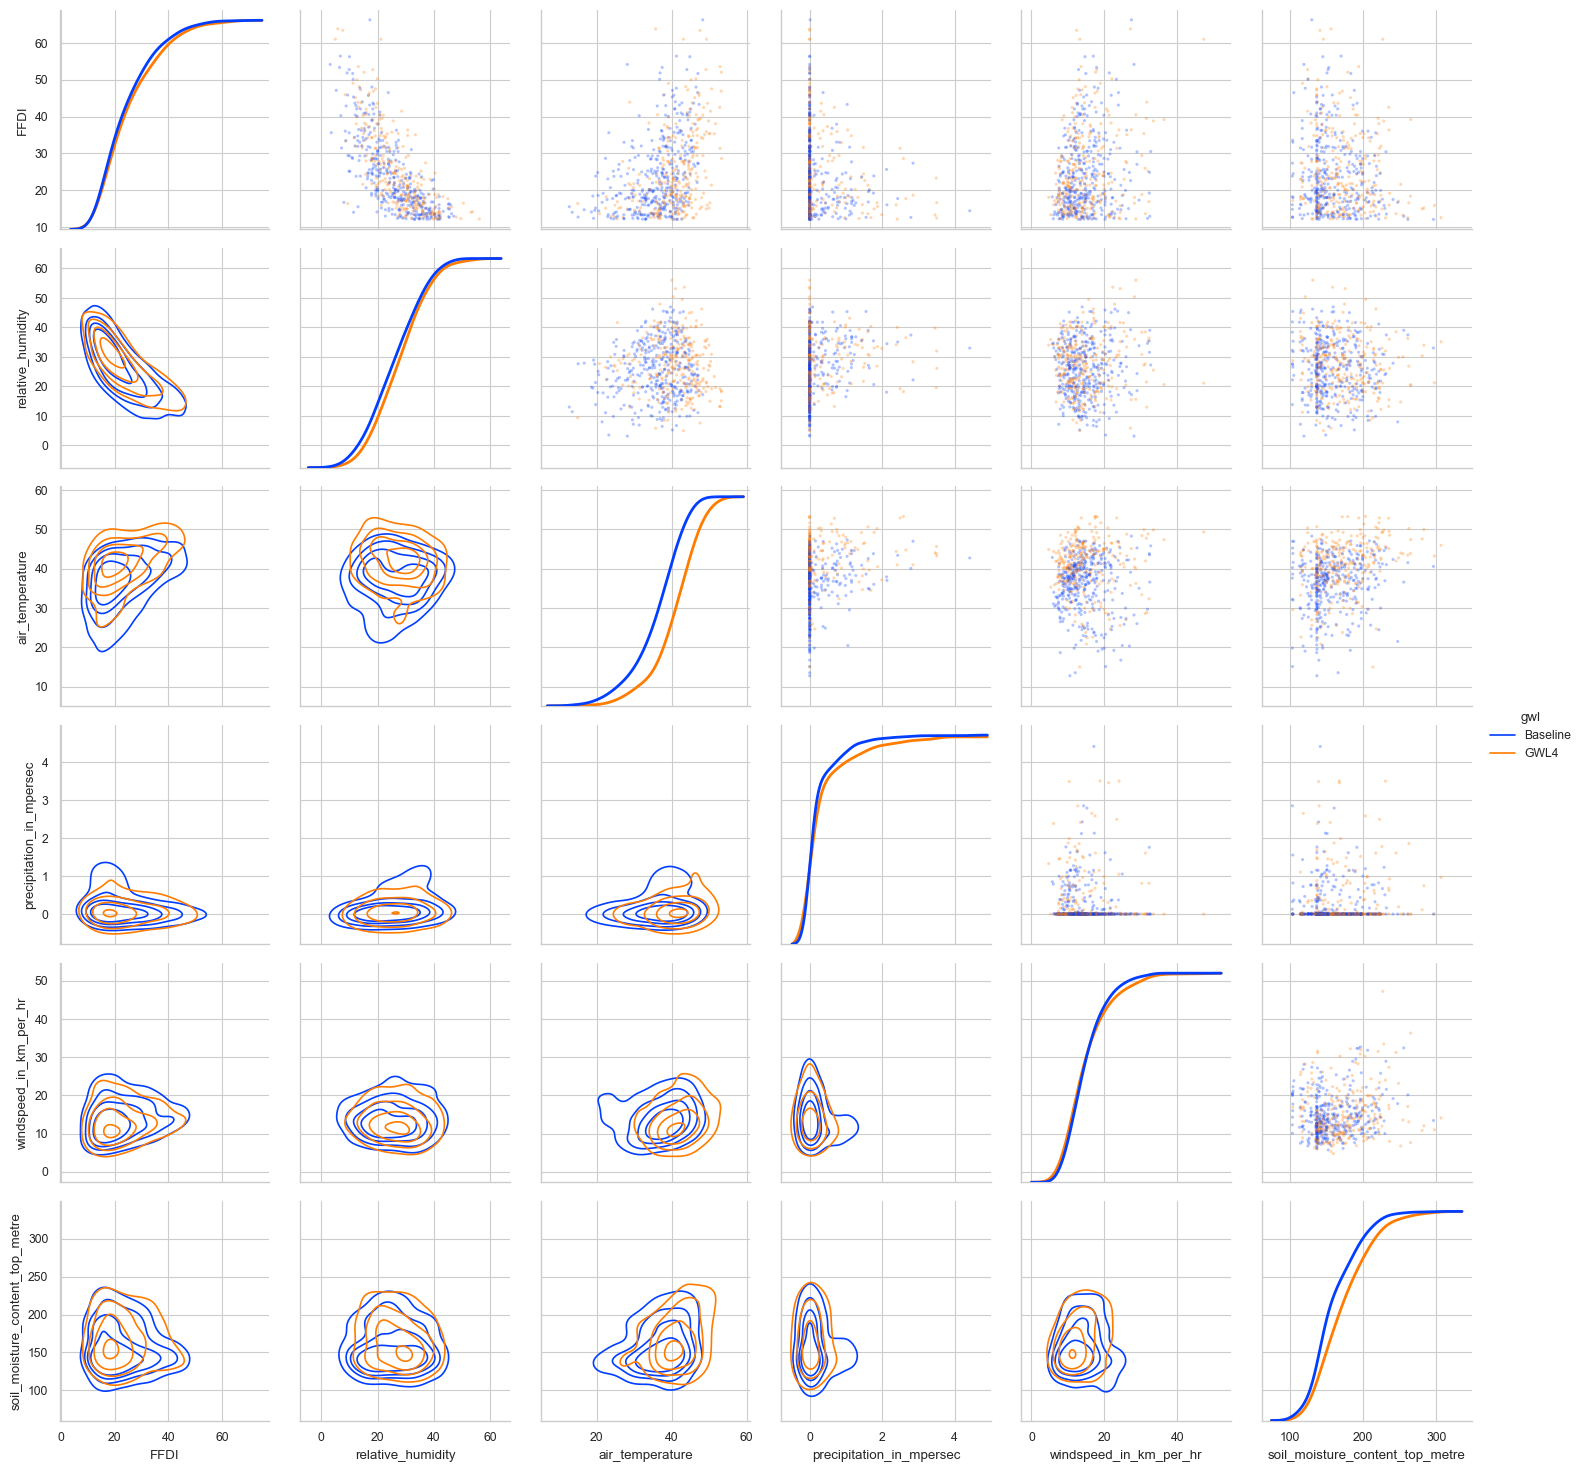

In [80]:
g = sns.PairGrid(data=df_final[df_final.names.isin(['United States of America']) & ((df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4'))].sample(frac=0.05, replace=False), vars=['FFDI', 'relative_humidity', 'air_temperature', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'soil_moisture_content_top_metre'], hue='gwl', palette="bright", hue_order=gwl_order)  # 'Australia', 'Brazil', 'United States of America'
g.map_upper(sns.scatterplot, alpha=0.3, linewidths=0, s=5)
g.map_lower(sns.kdeplot, levels=5, thresh=.2)
g.map_diag(sns.kdeplot, lw=2, cumulative=True, common_norm=False, common_grid=True)
g.add_legend()
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-USA-pairsplot_baseline-vs-4C.png')

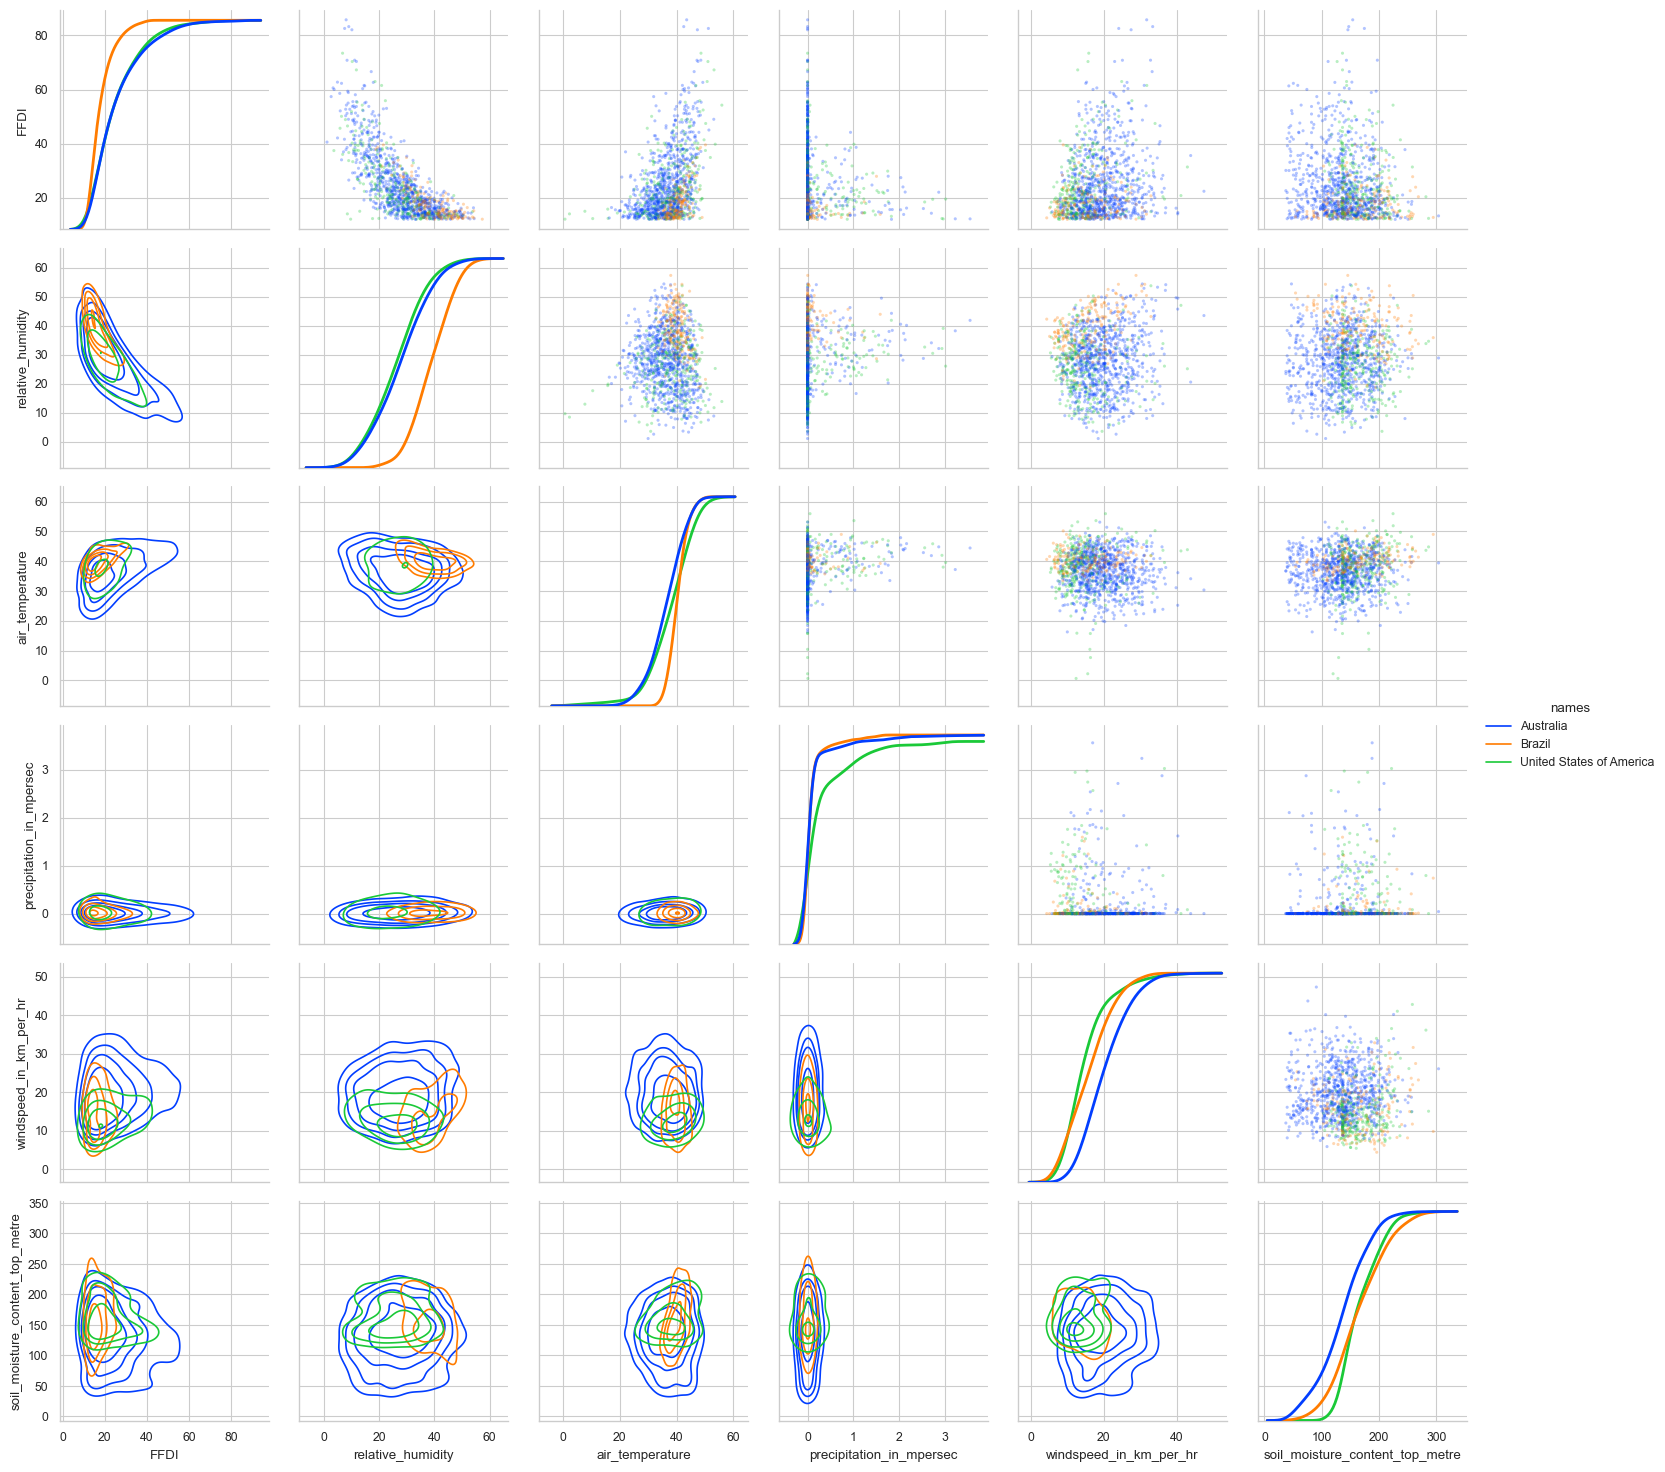

In [81]:
g = sns.PairGrid(data=df_final.sample(frac=0.01, replace=False), vars=['FFDI', 'relative_humidity', 'air_temperature', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'soil_moisture_content_top_metre'], hue='names', palette="bright")  # 'Australia', 'Brazil', 'United States of America'
g.map_upper(sns.scatterplot, alpha=0.3, linewidths=0, s=5)
g.map_lower(sns.kdeplot, levels=5, thresh=.2)
g.map_diag(sns.kdeplot, lw=2, cumulative=True, common_norm=False, common_grid=True)
g.add_legend()
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Australia-Brazil-USA_pairs-plot.png')

## Use random forest to assess variable importance

Taken from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

### Work through an example with Australia

In [27]:
mysample = df_final[df_final.names.isin(['Australia'])].sample(frac=0.1, replace=False)
mysample['ffdi_class_int'] = 0
mysample['ffdi_class_int'].loc[mysample['ffdi_class'] == 'FFDI >= 24'] = 1

In [28]:
feature_names = ['air_temperature', 'precipitation_in_mpersec', 'relative_humidity', 'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr']
X_features = mysample[feature_names]
y_classes = mysample[['FFDI']].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_classes, stratify=mysample['ffdi_class_int'], random_state=42)

In [29]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)


Elapsed time to compute the importances: 52.365 seconds


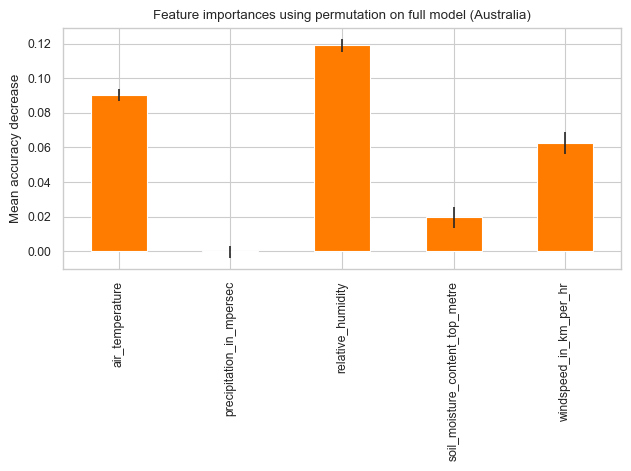

<Figure size 640x480 with 0 Axes>

In [33]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model (Australia)")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Australia_variable_importance.png')

### Run the same code for all 3 countries

In [39]:
output = []

for country in ['Australia', 'Brazil', 'United States of America']:
    # Subset the big dataframe
    mysample = df_final[df_final.names.isin([country])].sample(frac=0.1, replace=False)
    mysample['ffdi_class_int'] = 0
    mysample['ffdi_class_int'].loc[mysample['ffdi_class'] == 'FFDI >= 24'] = 1

    # Extract training and test data
    feature_names = ['air_temperature', 'precipitation_in_mpersec', 'relative_humidity', 'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr']
    X_features = mysample[feature_names]
    y_classes = mysample[['FFDI']].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_classes, stratify=mysample['ffdi_class_int'], random_state=42)

    # Run the RF classifier
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X_train, y_train)

    # Get the variable importance using the test data
    result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    forest_importances = pd.Series(result.importances_mean, index=feature_names)

    # Add into a DataFrame
    if isinstance(output, list):
        output = pd.DataFrame({'importances': forest_importances, 'importances_std': result.importances_std, 'country': country})
    else:
        newoutput = pd.DataFrame({'importances': forest_importances, 'importances_std': result.importances_std, 'country': country})
        output = pd.concat([output, newoutput])
    
# Now convert the index into a column
output = output.reset_index(inplace=False).rename(columns={'index': 'Variable'})

In [85]:
output['Variable'] = pd.Categorical(output['Variable'], output['Variable'].unique())
output['country'] = pd.Categorical(output['country'], output['country'].unique())

In [86]:
lookup = {'air_temperature': 'T', 'precipitation_in_mpersec': 'Pr', 'relative_humidity': 'RH', 'soil_moisture_content_top_metre': 'SM', 'windspeed_in_km_per_hr': 'W'}
output['Variable_nice'] = 'T'
for k, v in lookup.items():
    output['Variable_nice'].loc[output['Variable'] == k] = v

output

Variable  importances  importances_std  \
0                   air_temperature     0.085966         0.005191   
1          precipitation_in_mpersec    -0.001408         0.004475   
2                 relative_humidity     0.117404         0.003924   
3   soil_moisture_content_top_metre     0.015946         0.004160   
4            windspeed_in_km_per_hr     0.063732         0.004471   
5                   air_temperature     0.144040         0.009304   
6          precipitation_in_mpersec     0.004646         0.007117   
7                 relative_humidity     0.209495         0.005499   
8   soil_moisture_content_top_metre     0.031717         0.010343   
9            windspeed_in_km_per_hr     0.122424         0.009267   
10                  air_temperature     0.124586         0.005483   
11         precipitation_in_mpersec     0.014503         0.005028   
12                relative_humidity     0.157044         0.006240   
13  soil_moisture_content_top_metre     0.070166         0.008904   
14           windspeed_in_km_per_hr     0.070442         0.008757   

                     country Variable_nice  
0                  Australia             T  
1                  Australia            Pr  
2                  Australia            RH  
3                  Australia            SM  
4                  Australia             W  
5                     Brazil             T  
6                     Brazil            Pr  
7                     Brazil            RH  
8                     Brazil            SM  
9                     Brazil             W  
10  United States of America             T  
11  United States of America            Pr  
12  United States of America            RH  
13  United States of America            SM  
14  United States of America             W

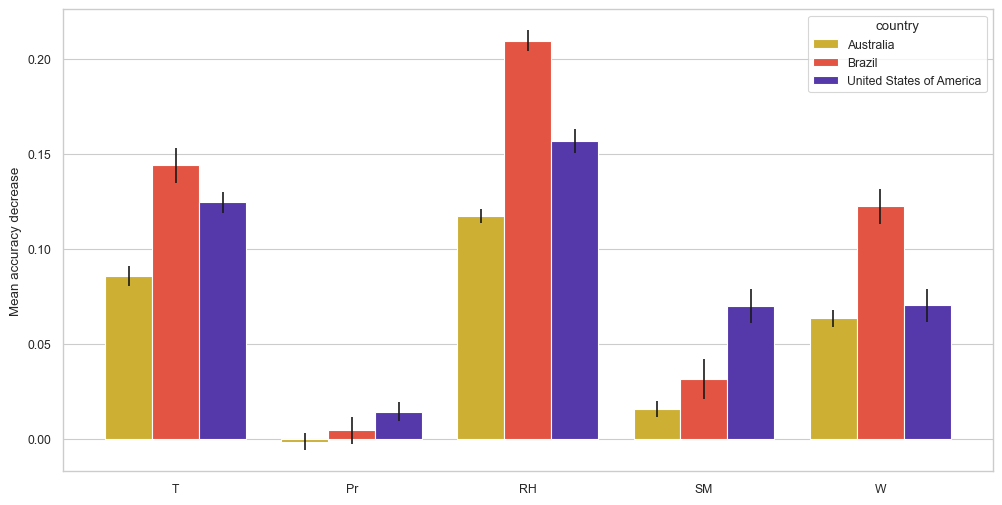

In [87]:

fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=output, x='Variable_nice', y='importances', hue='country', palette='CMRmap_r')
# Do something with error bars
# Based on https://stackoverflow.com/questions/72352491/how-to-plot-errorbars-on-seaborn-barplot 
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-3], y=y_coords[:-3], yerr=output["importances_std"], fmt="none", c="k")

ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("")
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers_variable_importance.png')